In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches

import pandas as pd

import numpy as np
from numpy import mean, std, interp, math

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

import seaborn as sns

Load in our 2017 fortune 500 dataset which can be found at https://data.world/aurielle/fortune-500-2017

In [2]:
fortune500 = pd.read_csv("Fortune 500 2017 - Fortune 500.csv", thousands=',')

Have a look at the datatypes of the columns in our dataset

In [3]:
fortune500.dtypes

Rank             int64
Title           object
Website         object
Employees        int64
Sector          object
Industry        object
Hqlocation      object
Hqaddr          object
Hqcity          object
Hqstate         object
Hqzip            int64
Hqtel           object
Ceo             object
Ceo-title       object
Address         object
Ticker          object
Fullname        object
Revenues         int64
Revchange      float64
Profits        float64
Prftchange     float64
Assets           int64
Totshequity    float64
dtype: object

In [4]:
fortune500.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0.0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53.0,56563,8924.0


Set the colors for our plots

In [5]:
finance_color = "#00008B"
not_finance_color = "#87CEFA"

In [6]:
colors = []
for i in range(21):
    if i == 6:
        colors.append(finance_color)
    else:
        colors.append(not_finance_color)

#### Plot showing which sectors are most represented in the 2017 Fortune 500.

Text(0.5, 1.0, 'Number of companies in the Fortune 500 per sector')

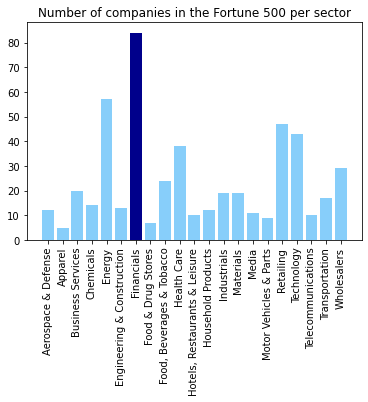

In [7]:
plt.bar(sorted(fortune500["Sector"].unique()), height = fortune500.groupby("Sector").count()["Rank"],
       color = colors)

ax = plt.gca()
ax.set_xticklabels(labels=sorted(fortune500["Sector"].unique()),rotation=90)
ax.set_title("Number of companies in the Fortune 500 per sector")

Create a new column in our dataframe which indicates whether the company is in the financial sector (1) or not (0).

In [8]:
fortune500["IsFinance?"] = pd.get_dummies(fortune500["Sector"])["Financials"]

For plotting purposes, split the dataset into one containing information about the businesses in the financial sector and one containing information about those that are not.

In [9]:
finance = fortune500[fortune500["IsFinance?"] == 1]
not_finance = fortune500[fortune500["IsFinance?"] == 0]

#### Plot the proportion of financial companies who have their headquarters in a certain state vs the total amount of company headquarters per state. 

Text(0, 0.5, 'Number of company headquarters')

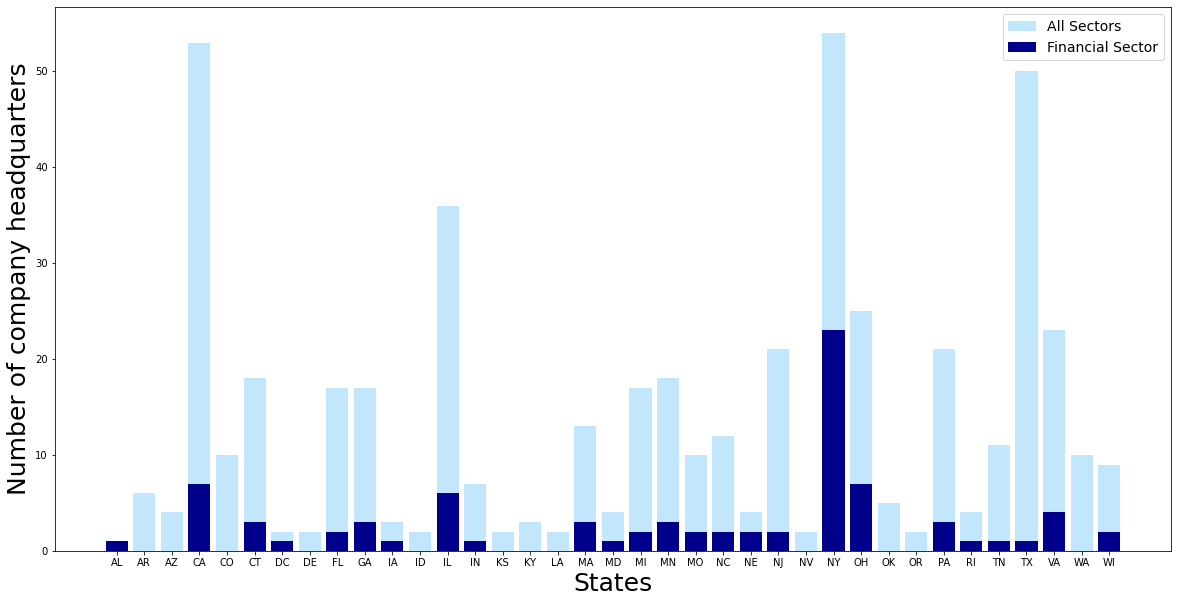

In [10]:
fig, ax = plt.subplots(1,1, figsize = (20, 10))


# bar plot for the non-financial sector businesses
ax.bar(sorted(fortune500["Hqstate"].unique()), height = fortune500.groupby("Hqstate").count()["Rank"], 
           color = not_finance_color,
           fill = True,
           label = "All Sectors", 
           alpha = 0.5)

# bar plot for the financial sector businesses
ax.bar(sorted(finance["Hqstate"].unique()), height = finance.groupby("Hqstate").count()["Rank"], 
           color = finance_color,
           fill = True,
           label = "Financial Sector")

plt.legend(fontsize = 14)
#plt.title("In which states are the headquarters of the financial companies in the fortune500?", fontsize = 20)
plt.xlabel("States", fontsize = 25)
plt.ylabel("Number of company headquarters", fontsize = 25)

#plt.savefig("Which State.png")

#### Plot the mean values for the quantitative input features for each sector.

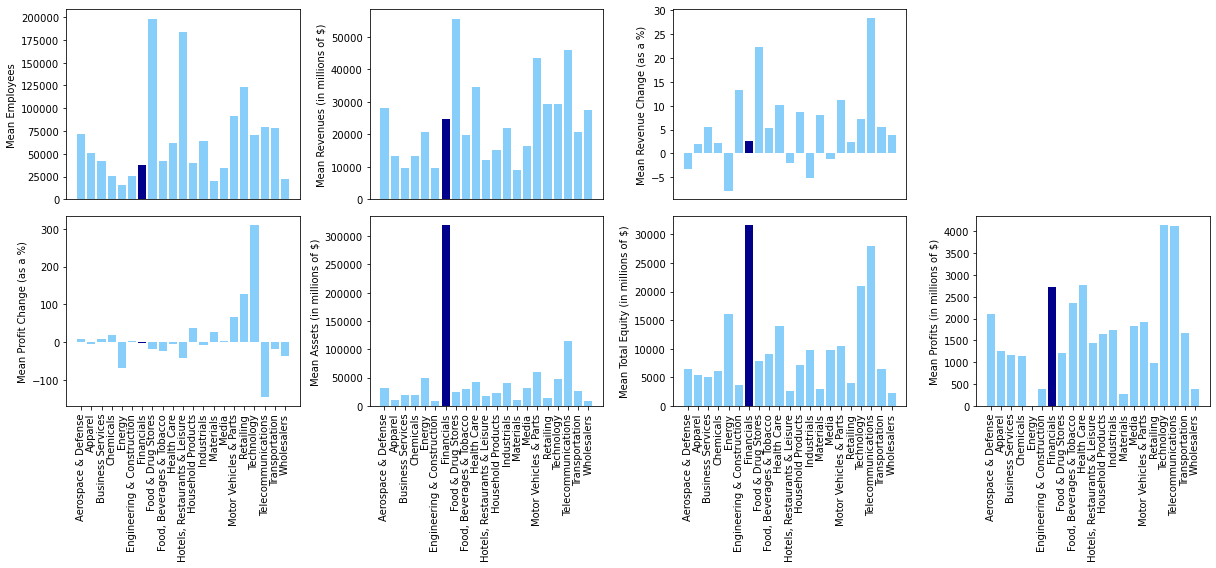

In [11]:
fig, axs = plt.subplots(2, 4, figsize = (17, 8))

axs[0,0].bar(sorted(fortune500["Sector"].unique()), height = fortune500.groupby("Sector").mean()["Employees"], 
             color= colors)
axs[0,1].bar(sorted(fortune500["Sector"].unique()), height = fortune500.groupby("Sector").mean()["Revenues"], 
             color= colors)
axs[0,2].bar(sorted(fortune500["Sector"].unique()), height = fortune500.groupby("Sector").mean()["Revchange"], 
             color=  colors)
axs[1,3].bar(sorted(fortune500["Sector"].unique()), height = fortune500.groupby("Sector").mean()["Profits"], 
             color= colors)
axs[1,0].bar(sorted(fortune500["Sector"].unique()), height = fortune500.groupby("Sector").mean()["Prftchange"], 
             color= colors)
axs[1,1].bar(sorted(fortune500["Sector"].unique()), height = fortune500.groupby("Sector").mean()["Assets"], 
             color= colors)
axs[1,2].bar(sorted(fortune500["Sector"].unique()), height = fortune500.groupby("Sector").mean()["Totshequity"], 
             color= colors)

fig.delaxes(axs[0,3])

axs[1, 0].set_xticklabels(labels=sorted(fortune500["Sector"].unique()),rotation=90)
axs[1, 1].set_xticklabels(labels=sorted(fortune500["Sector"].unique()),rotation=90)
axs[1, 2].set_xticklabels(labels=sorted(fortune500["Sector"].unique()),rotation=90)
axs[1, 3].set_xticklabels(labels=sorted(fortune500["Sector"].unique()),rotation=90)

axs[0,0].xaxis.set_visible(False)
axs[0,1].xaxis.set_visible(False)
axs[0,2].xaxis.set_visible(False)

axs[0,0].set_ylabel("Mean Employees")
axs[0,1].set_ylabel("Mean Revenues (in millions of $)")
axs[0,2].set_ylabel("Mean Revenue Change (as a %)")
axs[1,3].set_ylabel("Mean Profits (in millions of $)")
axs[1,0].set_ylabel("Mean Profit Change (as a %)")
axs[1,1].set_ylabel("Mean Assets (in millions of $)")
axs[1,2].set_ylabel("Mean Total Equity (in millions of $)")

plt.tight_layout()
plt.savefig("comparison.png", bbox_inches = "tight", dpi = fig.dpi)

This it the table containing the dummy variables for each state (if a company's headquarters is in the state corresponding to that column, the column's value will be 1, if not it will be 0)

In [12]:
state_dummies = pd.get_dummies(fortune500["Hqstate"])

Create our StandardScaler object in order to standardize our numerical column's data

In [13]:
scaler = StandardScaler()

This is our input features table, containing standardised values for Employees, Revenues, Revenue Change, Profits, Profit Change, Assets, Total Share Equity and dummy variables for each state present in the dataset. 

In [14]:
X = pd.concat([pd.DataFrame(scaler.fit_transform(fortune500[["Employees", "Revenues", "Revchange", "Profits", "Prftchange", "Assets", "Totshequity"]])), state_dummies], axis = 1)

In [15]:
X

,0,1,2,3,4,5,6,AL,AR,AZ,...,OH,OK,OR,PA,RI,TN,TX,VA,WA,WI
0,18.192467,12.056745,-0.148289,3.015930,-0.052097,0.438399,2.104046,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.524557,5.208811,0.117408,5.667686,-0.040993,2.000571,8.833642,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.483666,5.000843,-0.574408,11.162118,-0.063202,0.893178,3.758577,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.132572,4.723159,-1.025592,1.540698,-0.120421,0.925115,5.040068,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.094462,4.396336,0.122421,0.121649,0.040749,-0.088195,-0.154665,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.205550,-0.493871,0.102369,-0.356232,-0.034515,-0.289616,-0.503012,0,0,0,...,0,0,0,0,0,0,1,0,0,0
496,-0.422855,-0.494576,1.009750,-0.355240,-0.032973,-0.261525,-0.308637,0,0,0,...,0,0,0,1,0,0,0,0,0,0
497,-0.387989,-0.494602,0.012132,-0.506856,-0.032973,-0.119584,0.570920,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,-0.420982,-0.494732,0.012132,-0.506856,-0.032973,-0.241426,-0.230979,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Rename the columns of our input features

In [16]:
X.rename(
    columns = {0:"Employees", 1:"Revenues", 2:"Revchange", 3:"Profits", 4:"Prftchange", 5:"Assets", 6:"Totshequity"},
    inplace = True
)

In [17]:
X.head()

,Employees,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,AL,AR,AZ,...,OH,OK,OR,PA,RI,TN,TX,VA,WA,WI
0,18.192467,12.056745,-0.148289,3.015930,-0.052097,0.438399,2.104046,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.524557,5.208811,0.117408,5.667686,-0.040993,2.000571,8.833642,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.483666,5.000843,-0.574408,11.162118,-0.063202,0.893178,3.758577,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.132572,4.723159,-1.025592,1.540698,-0.120421,0.925115,5.040068,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.094462,4.396336,0.122421,0.121649,0.040749,-0.088195,-0.154665,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Our target variable
y = fortune500["IsFinance?"]

Split our data into training and testing datasets. 20% of our data will be used for testing and 80% will be used for training.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 420)

### Logistic Regression

Create our object that will split our dataset into 5 stratified folds that will be used for cross-validation to check our
model's performance.

In [20]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 420)

In [21]:
kfold.get_n_splits(X, y)

5

Obtain our Stratified K-Fold cross-validation's results

In [22]:
accs = []

for train_index, test_index in kfold.split(X, y):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))
    
print(f"Mean Accuracy Score for 5 fold Stratified Cross Validation: {np.round(np.mean(accs), 4)} with Standard Dev.: {np.round(np.std(accs), 4)}")

Mean Accuracy Score for 5 fold Stratified Cross Validation: 0.904 with Standard Dev.: 0.0136


Here we create a dataframe containing the features of our model and their coefficients

In [23]:
LogReg_coefs = pd.DataFrame({"feature" : X.columns, "coefs" : LogReg.coef_[0]})

In [24]:
LogReg_coefs.head()

,feature,coefs
0,Employees,-1.487613
1,Revenues,-1.595718
2,Revchange,-0.072201
3,Profits,-0.371135
4,Prftchange,-0.021754


#### Plot the importance of each feature in the Logistic Regression
A high positive score means that the presence of this feature is more likely to lead to a prediction that the company belongs to the financial sector, whereas a high negative score means the presence of this feature is more likely to lead to a prediction that the company does not belong to the financial sector. A coefficient that is close to 0 means that the feature is not helpful in the prediction of whether the company belongs to the financial sector or not.

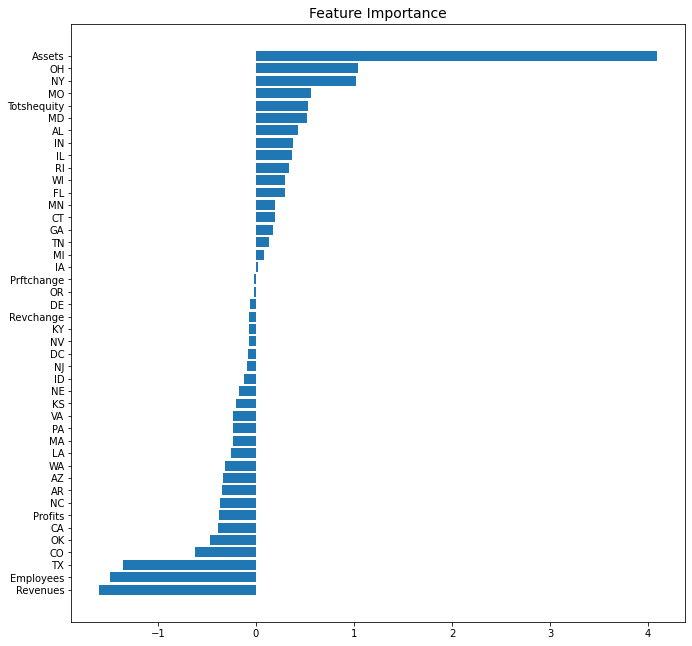

In [25]:
LogReg_coefs.sort_values("coefs", inplace=True)

fig, ax  = plt.subplots(figsize= (11, 11))

ax.barh(LogReg_coefs["feature"], LogReg_coefs["coefs"])

ax.set_title("Feature Importance", fontsize = 14)

ax = plt.gca()

Set the threshold for what coefficient we define to be an "important" feature. This threshold is aribtrary and a better way to do this would be to obtain the p-values for each coefficient and the "non-important" features would therefore be those who have a p-value under 0.05. However, sklearn does not have any way to extract the p-values for each coefficient and I have therefore chosen this way as an appropriate way to choose "important" features. 

In [26]:
LogReg_importance_threshold = 0.5

Table corresponding to the most "important" features and their coefficients. 

In [27]:
LogReg_most_imp = LogReg_coefs.query(f"coefs < -{LogReg_importance_threshold} or coefs > {LogReg_importance_threshold}")

In [28]:
LogReg_most_imp

,feature,coefs
1,Revenues,-1.595718
0,Employees,-1.487613
40,TX,-1.357575
11,CO,-0.624893
25,MD,0.523133
6,Totshequity,0.528139
28,MO,0.558977
33,NY,1.018447
34,OH,1.040736
5,Assets,4.092952


#### Plot the most important features

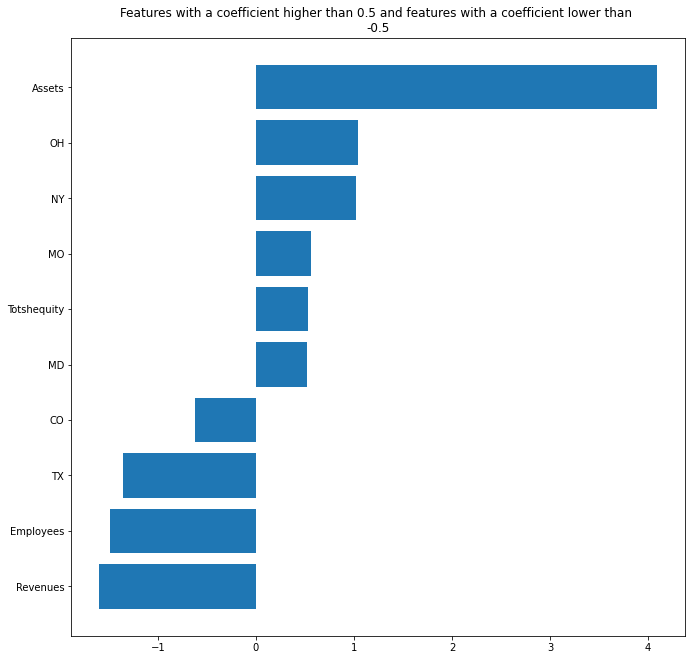

In [29]:
fig, ax  = plt.subplots(figsize= (11, 11))

ax.barh(LogReg_most_imp["feature"], LogReg_most_imp["coefs"])

ax.set_title(f"Features with a coefficient higher than {LogReg_importance_threshold} and features with a coefficient lower than \n-{LogReg_importance_threshold}")

ax = plt.gca()

Table corresponding to the least "important" features and their coefficients. 

In [30]:
LogReg_least_imp = LogReg_coefs.query(f"coefs > -{LogReg_importance_threshold} and coefs < {LogReg_importance_threshold}")

In [31]:
LogReg_least_imp.head()

,feature,coefs
35,OK,-0.463845
10,CA,-0.388428
3,Profits,-0.371135
29,NC,-0.362310
8,AR,-0.343063


We drop the least important features from our feature list.

In [32]:
LogReg_X_final =  X.drop(LogReg_least_imp["feature"].unique().tolist(), axis = 1)

In [33]:
LogReg_X_final

,Employees,Revenues,Assets,Totshequity,CO,MD,MO,NY,OH,TX
0,18.192467,12.056745,0.438399,2.104046,0,0,0,0,0,0
1,2.524557,5.208811,2.000571,8.833642,0,0,0,0,0,0
2,0.483666,5.000843,0.893178,3.758577,0,0,0,0,0,0
3,0.132572,4.723159,0.925115,5.040068,0,0,0,0,0,1
4,0.094462,4.396336,-0.088195,-0.154665,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
495,-0.205550,-0.493871,-0.289616,-0.503012,0,0,0,0,0,1
496,-0.422855,-0.494576,-0.261525,-0.308637,0,0,0,0,0,0
497,-0.387989,-0.494602,-0.119584,0.570920,0,0,0,0,0,0
498,-0.420982,-0.494732,-0.241426,-0.230979,0,0,0,0,0,1


Obtain the results for different accuracy metrics, using Stratified K-Fold cross-validation, of the model which only contains the features we have deemed "important".

In [34]:
LogReg_accs = []
LogReg_recalls = []
LogReg_precs = []
for train_index, test_index in kfold.split(LogReg_X_final, y):
    X_train , X_test = LogReg_X_final.iloc[train_index,:], LogReg_X_final.iloc[test_index,:]
    y_train , y_test = y[train_index], y[test_index]
    Final_LogReg_Model = LogisticRegression()
    Final_LogReg_Model.fit(X_train, y_train)
    y_pred = Final_LogReg_Model.predict(X_test)
    LogReg_accs.append(accuracy_score(y_test, y_pred))
    LogReg_recalls.append(recall_score(y_test, y_pred))
    LogReg_precs.append(precision_score(y_test, y_pred))
    
print(f"Mean Accuracy Score for 5 fold Stratified Cross Validation: {np.round(np.mean(LogReg_accs), 4)} with Standard Dev.: {np.round(np.std(LogReg_accs), 4)}")
print(f"Mean Recall Score for 5 fold Stratified Cross Validation: {np.round(np.mean(LogReg_recalls), 4)} with Standard Dev.: {np.round(np.std(LogReg_recalls), 4)}")
print(f"Mean Precision Score for 5 fold Stratified Cross Validation: {np.round(np.mean(LogReg_precs), 4)} with Standard Dev.: {np.round(np.std(LogReg_precs), 4)}")

Mean Accuracy Score for 5 fold Stratified Cross Validation: 0.902 with Standard Dev.: 0.0117
Mean Recall Score for 5 fold Stratified Cross Validation: 0.4404 with Standard Dev.: 0.0873
Mean Precision Score for 5 fold Stratified Cross Validation: 0.96 with Standard Dev.: 0.049


### Support Vector Classifier

We use Grid Seach CV which takes in a dictionary of parameter values for a certain model (here SVC) and returns the optimal combination and value of hyperparameters.

In [35]:
pipelineSVC = make_pipeline(SVC(random_state=420))

# Create the parameter grid
param_grid_svc = [{
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['linear']
                  },
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['rbf']
                 }]

# Create an instance of GridSearch Cross-validation estimator
gsSVC = GridSearchCV(estimator = pipelineSVC,
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=5,
                     refit=True,
                     n_jobs=1)

# Train the SVM classifier
gsSVC.fit(X_train, y_train)

# Print the training score of the best model
print(gsSVC.best_score_)

# Print the model parameters of the best model
print(gsSVC.best_params_)

0.9225
{'svc__C': 10.0, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


We now use the best hyperparameters obtained from the Grid Search CV to train our model and obtain accuracy scores using Stratified K-Fold cross-validation.

In [36]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 420)

In [37]:
accs = []

for train_index, test_index in kfold.split(X, y):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    svc =  SVC(C = gsSVC.best_params_["svc__C"], gamma = gsSVC.best_params_["svc__gamma"], kernel = gsSVC.best_params_["svc__kernel"], random_state = 420)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))
    
print(f"Mean Accuracy Score for 5 fold Stratified Cross Validation: {np.round(np.mean(accs), 4)} with Standard Dev.: {np.round(np.std(accs), 4)}")

Mean Accuracy Score for 5 fold Stratified Cross Validation: 0.908 with Standard Dev.: 0.0117


Obtain the coefficients for our features. This is only possible because we have used a linear kernel in our svm.

In [38]:
svc = SVC(C = gsSVC.best_params_["svc__C"], gamma = gsSVC.best_params_["svc__gamma"], kernel = gsSVC.best_params_["svc__kernel"], random_state = 420)
svc.fit(X, y)
svc.coef_

array([[-1.10595211, -1.62949483, -0.15242205, -0.04026951,  0.0249178 ,
         6.5642282 , -0.1880198 ,  0.        ,  0.        ,  0.        ,
        -0.2844618 , -0.18194409,  0.42754608,  0.        ,  0.        ,
         0.09535932,  0.        ,  0.        ,  0.        ,  0.43641716,
         0.32216565,  0.        ,  0.        , -0.32661671, -0.13523147,
         0.21634841,  0.0453655 ,  0.        ,  0.46726441, -1.50036261,
         0.58411984, -0.04562537,  0.        ,  0.45666403,  0.47474743,
        -0.52514397,  0.        , -0.23485614,  0.        ,  0.32372974,
        -0.80606833,  0.06541197,  0.        ,  0.12517094]])

Create a data frame contain the features and their corresponding coefficients

In [39]:
svc_coefs = pd.DataFrame({"feature" : X.columns, "coefs" : svc.coef_[0]})

#### Plot the features and their corresponding importance for our Support Vector Classifier that used a linear kernel
Once again, a high positive score means that the presence of this feature is more likely to lead to a prediction that the company belongs to the financial sector, whereas a high negative score means the presence of this feature is more likely to lead to a prediction that the company does not belong to the financial sector. A coefficient that is close to 0 means that the feature is not helpful in the prediction of whether the company belongs to the financial sector or not.

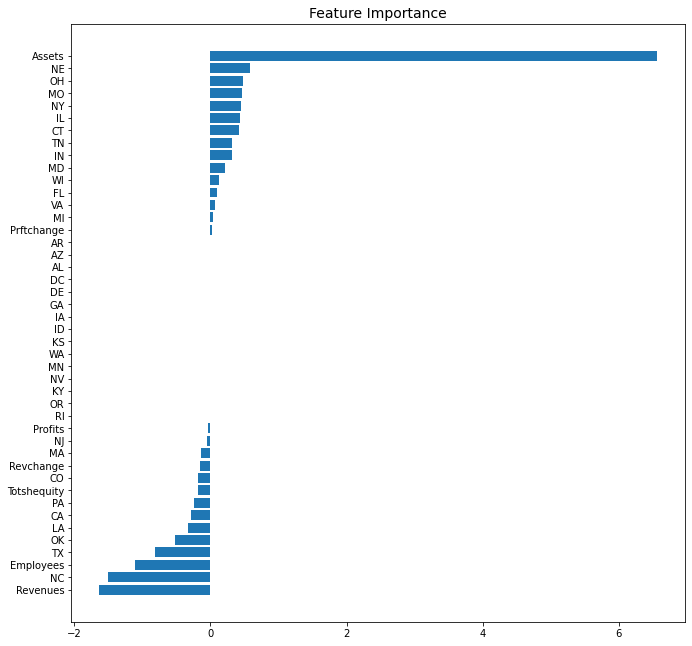

In [40]:
svc_coefs.sort_values("coefs", inplace=True)

fig, ax  = plt.subplots(figsize= (11, 11))

ax.barh(svc_coefs["feature"], svc_coefs["coefs"])

ax.set_title("Feature Importance", fontsize = 14)

ax = plt.gca()

In [41]:
svc_importance_threshold = 0.1

Table containing the most "important" features for our Support Vector Classifier model and their coefficients as determined by our arbitrary threshold. 

In [42]:
svc_most_imp = svc_coefs.query(f"coefs < -{svc_importance_threshold} or coefs > {svc_importance_threshold}")

In [43]:
svc_most_imp.sort_values(by = "coefs", inplace = True)

<ipython-input-43-bb340df99efa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svc_most_imp.sort_values(by = "coefs", inplace = True)


#### Plot the most important features. 

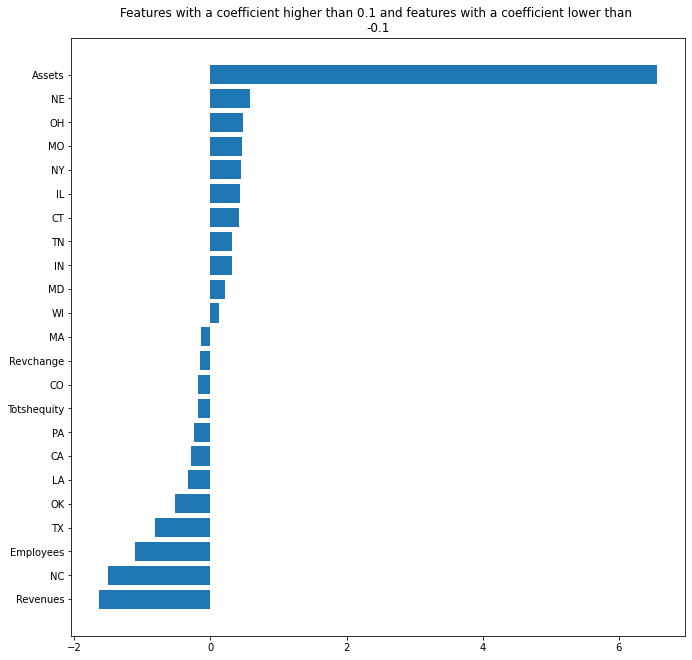

In [44]:
fig, ax  = plt.subplots(figsize= (11, 11))

ax.barh(svc_most_imp["feature"], svc_most_imp["coefs"])

ax.set_title(f"Features with a coefficient higher than {svc_importance_threshold} and features with a coefficient lower than \n-{svc_importance_threshold}")

ax = plt.gca()

Table containing our least "important" features, which we will then drop from our features list

In [45]:
svc_least_imp = svc_coefs.query(f"coefs > -{svc_importance_threshold} and coefs < {svc_importance_threshold}")

In [46]:
svc_least_imp.head()

,feature,coefs
31,NJ,-0.045625
3,Profits,-0.040270
38,RI,0.000000
36,OR,0.000000
22,KY,0.000000


In [47]:
svc_X_final =  X.drop(svc_least_imp["feature"].unique().tolist(), axis = 1)

In [48]:
svc_X_final

,Employees,Revenues,Revchange,Assets,Totshequity,CA,CO,CT,IL,IN,...,MO,NC,NE,NY,OH,OK,PA,TN,TX,WI
0,18.192467,12.056745,-0.148289,0.438399,2.104046,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.524557,5.208811,0.117408,2.000571,8.833642,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.483666,5.000843,-0.574408,0.893178,3.758577,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.132572,4.723159,-1.025592,0.925115,5.040068,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.094462,4.396336,0.122421,-0.088195,-0.154665,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.205550,-0.493871,0.102369,-0.289616,-0.503012,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
496,-0.422855,-0.494576,1.009750,-0.261525,-0.308637,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
497,-0.387989,-0.494602,0.012132,-0.119584,0.570920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,-0.420982,-0.494732,0.012132,-0.241426,-0.230979,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Evaluating our final model, using Stratified K-Fold cross-validation, which only contains our most "important" features.

In [49]:
svc_accs = []
svc_recalls = []
svc_precs = []
for train_index, test_index in kfold.split(svc_X_final, y):
    X_train , X_test = svc_X_final.iloc[train_index,:], svc_X_final.iloc[test_index,:]
    y_train , y_test = y[train_index], y[test_index]
    Final_svc_Model = SVC(C = gsSVC.best_params_["svc__C"], gamma = gsSVC.best_params_["svc__gamma"], kernel = gsSVC.best_params_["svc__kernel"], random_state = 420, probability = True)
    Final_svc_Model.fit(X_train, y_train)
    y_pred = Final_svc_Model.predict(X_test)
    svc_accs.append(accuracy_score(y_test, y_pred))
    svc_recalls.append(recall_score(y_test, y_pred))
    svc_precs.append(precision_score(y_test, y_pred))
    
print(f"Mean Accuracy Score for 5 fold Stratified Cross Validation: {np.round(np.mean(svc_accs), 4)} with Standard Dev.: {np.round(np.std(svc_accs), 4)}")
print(f"Mean Recall Score for 5 fold Stratified Cross Validation: {np.round(np.mean(svc_recalls), 4)} with Standard Dev.: {np.round(np.std(svc_recalls), 4)}")
print(f"Mean Precision Score for 5 fold Stratified Cross Validation: {np.round(np.mean(svc_precs), 4)} with Standard Dev.: {np.round(np.std(svc_precs), 4)}")

Mean Accuracy Score for 5 fold Stratified Cross Validation: 0.912 with Standard Dev.: 0.0133
Mean Recall Score for 5 fold Stratified Cross Validation: 0.5816 with Standard Dev.: 0.1132
Mean Precision Score for 5 fold Stratified Cross Validation: 0.8588 with Standard Dev.: 0.0904


### Comparing both models

#### Plots showing the importance of the features for both models

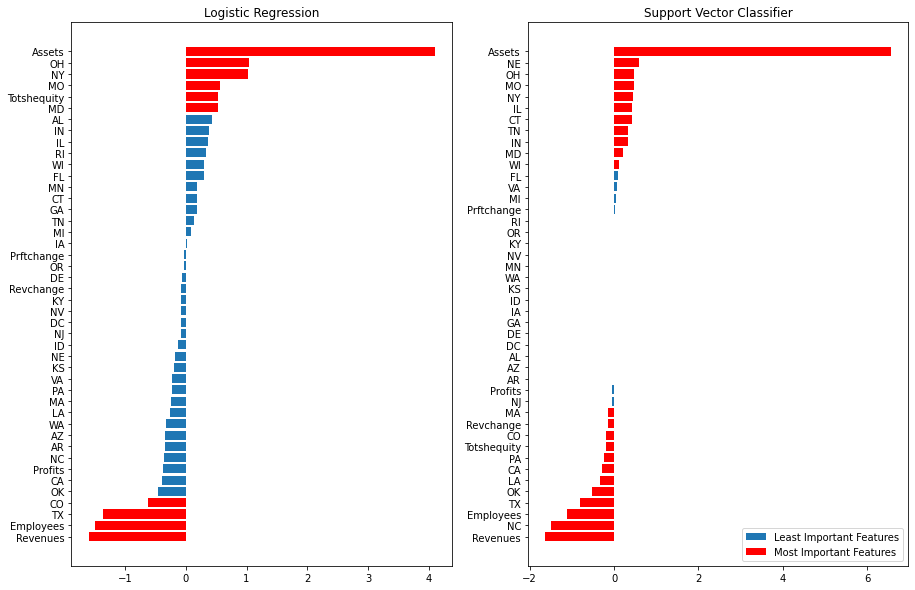

In [50]:
svc_coefs.sort_values("coefs", inplace=True)

LogReg_coefs.sort_values("coefs", inplace=True)

fig, axs  = plt.subplots(1, 2, figsize= (15, 10))

axs[0].barh(LogReg_coefs["feature"], LogReg_coefs["coefs"], label = "Least Important Features")
axs[0].set_title("Logistic Regression")

axs[1].barh(svc_coefs["feature"], svc_coefs["coefs"], label = "Least Important Features")
axs[1].set_title("Support Vector Classifier")

axs[0].barh(LogReg_most_imp["feature"], LogReg_most_imp["coefs"], color = "Red", label = "Most Important Features")

axs[1].barh(svc_most_imp["feature"], svc_most_imp["coefs"], color = "Red", label = "Most Important Features")

plt.legend()
#plt.savefig("Feature Importance.png")

In [51]:
LogReg_X_final_train, LogReg_X_final_test, LogReg_y_final_train, LogReg_y_final_test = train_test_split(LogReg_X_final, y, test_size = 0.2, stratify = y, random_state = 420)
svc_X_final_train, svc_X_final_test, svc_y_final_train, svc_y_final_test = train_test_split(svc_X_final, y, test_size = 0.2, stratify = y, random_state = 420)

In [52]:
svc =  SVC(C = gsSVC.best_params_["svc__C"], gamma = gsSVC.best_params_["svc__gamma"], kernel = gsSVC.best_params_["svc__kernel"], random_state = 420, probability = True)
LogReg = LogisticRegression()

#### Plot comparing the ROC Curves of both models

Text(0.63, 0.4, 'Less accurate area')

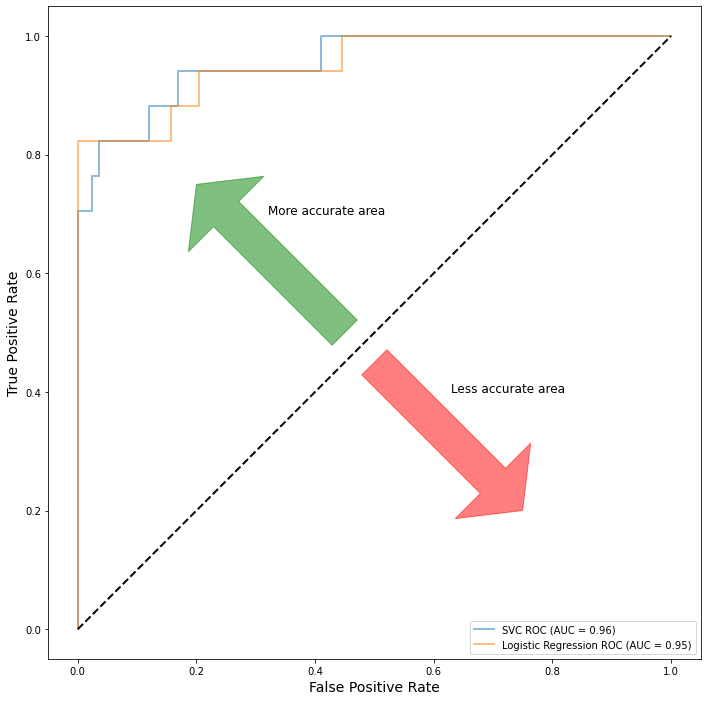

In [53]:
fig1 = plt.figure(figsize=[12, 12])
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(
    patches.Arrow(0.45, 0.5, -0.25, 0.25, width=0.3, color='green', alpha=0.5)
)
ax1.add_patch(
    patches.Arrow(0.5, 0.45, 0.25, -0.25, width=0.3, color='red', alpha=0.5)
)

svc_prediction  = svc.fit(svc_X_final_train, svc_y_final_train)
svc_y_pred_proba = svc.predict_proba(svc_X_final_test)[::, 1]
svc_fpr, svc_tpr, svc_t = roc_curve(svc_y_final_test, svc_y_pred_proba)    
svc_auc = roc_auc_score(svc_y_final_test, svc_y_pred_proba)

ax1.plot(svc_fpr, svc_tpr, lw=2, label='SVC ROC (AUC = %0.2f)' % (svc_auc), alpha = 0.5)

LogReg_prediction  = LogReg.fit(LogReg_X_final_train, LogReg_y_final_train)
LogReg_y_pred_proba = LogReg.predict_proba(LogReg_X_final_test)[::, 1]
LogReg_fpr, LogReg_tpr, LogReg_t = roc_curve(LogReg_y_final_test, LogReg_y_pred_proba)    
LogReg_auc = roc_auc_score(LogReg_y_final_test, LogReg_y_pred_proba)

ax1.plot(LogReg_fpr, LogReg_tpr, lw=2, label='Logistic Regression ROC (AUC = %0.2f)' % (LogReg_auc), alpha = 0.5)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')

plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
#plt.title('Comparing the ROC Curves for our Logistic Regression and our Support Vector Classifier models')
plt.legend(loc="lower right")
plt.text(0.32, 0.7, 'More accurate area', fontsize=12)
plt.text(0.63, 0.4, 'Less accurate area', fontsize=12)

#plt.savefig("Roc Curves.png")